### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore", category=Warning)
%matplotlib inline

### Functions

In [38]:
def plot_fit_and_forecast(result, N_test):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df["Passengers"], label="data")
    
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color="green", label="fitted")
    
    forecast, stder, confint = result.forecast(N_test)
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index, confint[:,0], confint[:,1], color="red", alpha=0.3)
    ax.legend()

    
def plot_fit_and_forecast_int(result, d, N_test, col="Passengers"):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df[col], label="data")
    
    train_pred = result.predict(start=train.index[d], end=train.index[-1], typ="levels")
    

    ax.plot(train.index[d:], train_pred, color="green", label="fitted")
    
    forecast, stder, confint = result.forecast(N_test)
    ax.plot(test.index, forecast, label="forecast")
    ax.fill_between(test.index, confint[:,0], confint[:,1], color="red", alpha=0.3)
    ax.legend()
    

def plot_difference(result, d, N_test, col="Passengers"):  
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    
    diff = df[col].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(diff, label="true 1st difference")
    ax.plot(train_pred, label="fitted 1st difference")


def rmse(result, N_test, is_logged):
    forecast, stder, confint = result.forecast(N_test)
    if is_logged:
        forecast = np.exp(forecast)
    
    t = test["Passengers"]
    y = forecast
    
    return np.sqrt(np.mean((t - y)**2))

### Code

In [3]:
df = pd.read_csv("airline_passengers.csv", index_col="Month", parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


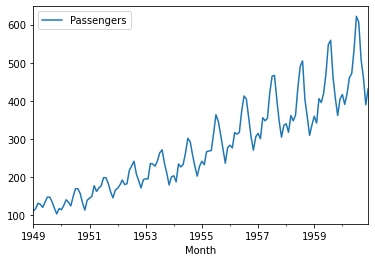

In [5]:
df.plot();

In [6]:
df["1stdiff"] = df["Passengers"].diff()

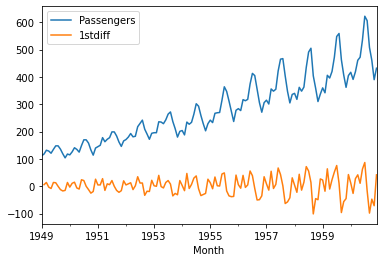

In [7]:
df.plot();

In [8]:
df["LogPassengers"] = np.log(df["Passengers"])

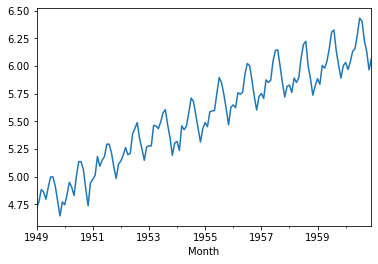

In [9]:
df["LogPassengers"].plot();

In [10]:
df.index.freq = "MS"

In [11]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [12]:
arima = ARIMA(train["Passengers"], order=(1,0,0))
arima_result = arima.fit()

In [13]:
df.loc[:-N_test,"AR(1)"] = arima_result.predict(start=train.index[0], end=train.index[-1])

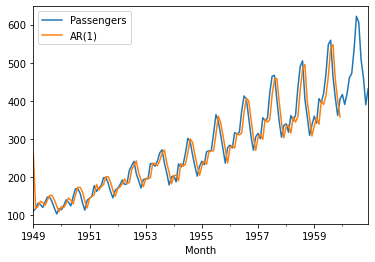

In [14]:
df[["Passengers","AR(1)"]].plot();

In [15]:
forecast, stder, confint = arima_result.forecast(N_test)

In [16]:
df.loc[-N_test:,"AR(1)"] = forecast

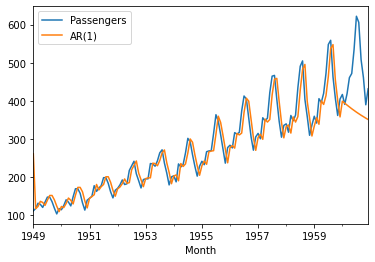

In [17]:
df[["Passengers","AR(1)"]].plot();

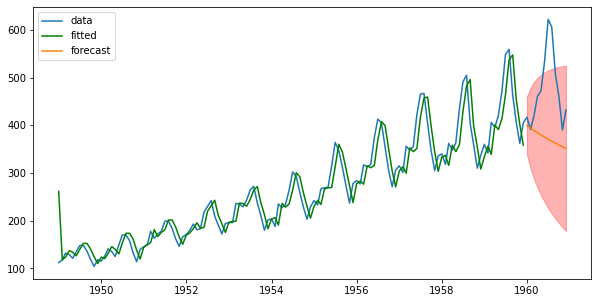

In [18]:
plot_fit_and_forecast(arima_result, N_test)

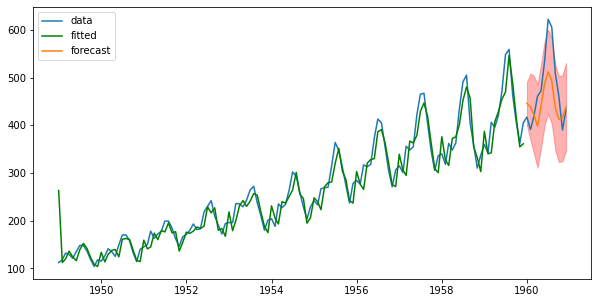

In [19]:
arima = ARIMA(train["Passengers"], order=(10,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result, N_test)

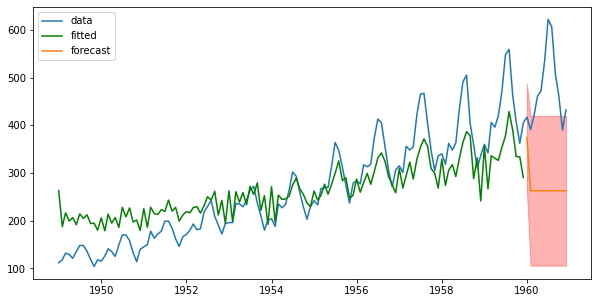

In [20]:
arima = ARIMA(train["Passengers"], order=(0,0,1))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result, N_test)

In [21]:
df["Log1stDiff"] = df["LogPassengers"].diff()

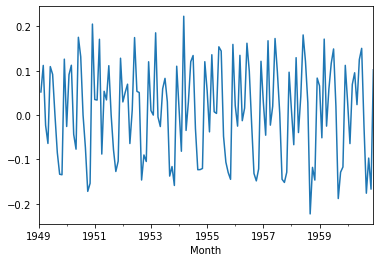

In [22]:
df["Log1stDiff"].plot();

In [23]:
arima = ARIMA(train["Passengers"], order=(8,1,1))
arima_result_811 = arima.fit()

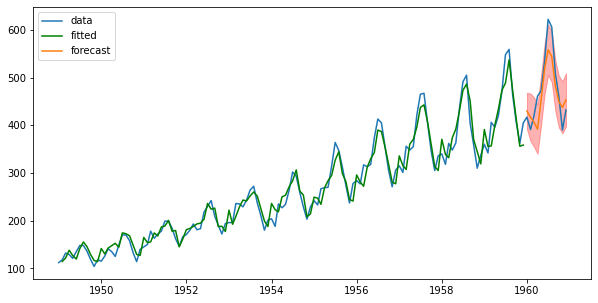

In [24]:
plot_fit_and_forecast_int(arima_result_811, d=1, N_test=N_test, col="Passengers")

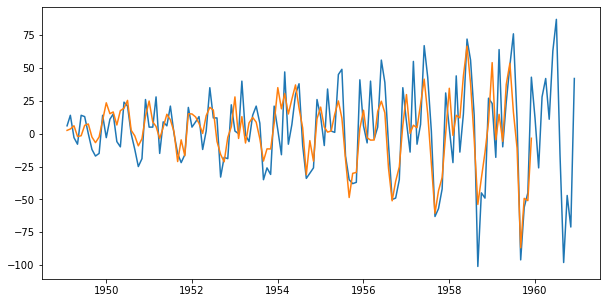

In [25]:
plot_difference(arima_result_811, d=1, N_test=N_test, col="Passengers")

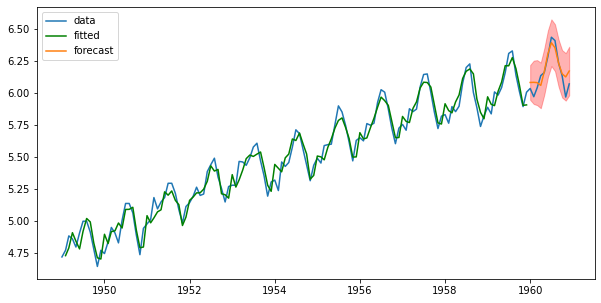

In [26]:
arima = ARIMA(train["LogPassengers"], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, d=1, N_test=N_test, col="LogPassengers")

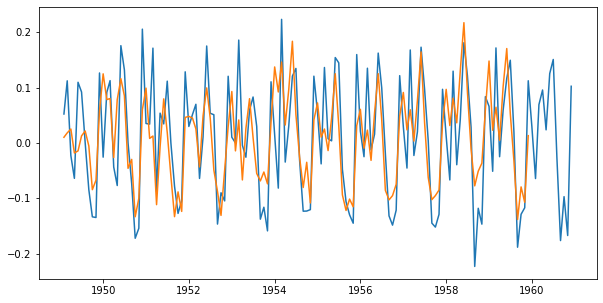

In [27]:
plot_difference(arima_result_log811, d=1, N_test=N_test, col="LogPassengers")

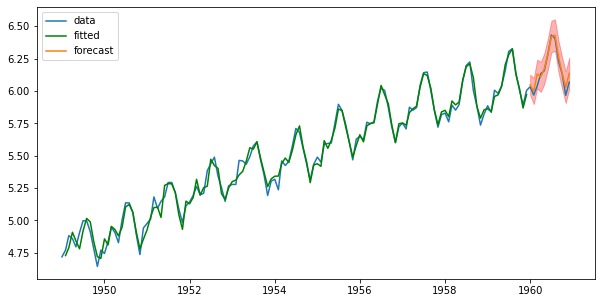

In [28]:
arima = ARIMA(train["LogPassengers"], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, d=1, N_test=N_test, col="LogPassengers")

In [39]:
print("ARIMA(8,1,1)        :",rmse(arima_result_811, N_test, False))
print("ARIMA(8,1,1)  logged:",rmse(arima_result_log811, N_test, True))
print("ARIMA(12,1,0) logged:",rmse(arima_result_log1210, N_test, True))

ARIMA(8,1,1)        : 38.550686992885325
ARIMA(8,1,1)  logged: 32.22405380110596
ARIMA(12,1,0) logged: 18.611900624900812
